In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./data_tag.csv",header=None)   #读取表格，并设置header=None
data.columns = ["X1","X2","label"]  #设置列名
data.shape  #形状

(20, 3)

In [3]:
data_1 = np.ones([20,1])
data_1.shape
data = np.column_stack([data_1,data])   #横向堆叠
data.shape

(20, 4)

In [4]:
data_x = data[:,0:3]  #切片，取出前三列数据
data_x.shape

(20, 3)

In [5]:
data_y = data[:,3]   #切片，取出最后一列数据（标签）
data_y = data_y.reshape([20,1])

In [6]:
data_y.shape

(20, 1)

In [7]:
theta = np.zeros((3,1))  #初始化为3*1的数据
theta.shape

(3, 1)

In [8]:
#sigmoid函数
def sigmoid(x):  #sigmoid函数，y=1 / (e^(-x) + 1)
    return 1 / ( np.exp( (-1) *x ) + 1)

In [9]:
#预测
def model(X, theta):
    return sigmoid(np.dot(X, theta))  #X是20*3，theta得是3*1才能得到20*1，所以不用转置

In [10]:
# 损失函数
def cost(X, theta, y):
    #损失函数的最大似然函数
    loss = -y * np.log(model(X, theta)) - (1 - y) * np.log(1 - model(X, theta))
    return np.sum(loss) / (len(X))  # 求平均损失

In [11]:
#梯度下降
def gradient(X, theta, y):
    leny = len(y)  #leny保存y的数据的行数
    y_pred = sigmoid(np.dot(X,theta))
    #print(y_pred.shape)  #(20,1)
    grad = (1 / leny) * (np.dot(X.T,y_pred - y))
    return grad

In [12]:
grad = gradient(data_x,theta,data_y)   #梯度下降，得到梯度
grad.shape

(3, 1)

In [13]:
_cost = list()
def LR(data_x,data_y,theta,lr=0.1):   #逻辑回归
    for i in range(10000):
        theta -= lr * gradient(data_x,theta,data_y)
        _cost.append(cost(data_x,theta,data_y))

In [14]:
LR(data_x,data_y,theta=theta,lr=0.1)
theta

array([[ 0.27379891],
       [-3.74682211],
       [ 3.2911016 ]])

Text(0, 0.5, 'cost')

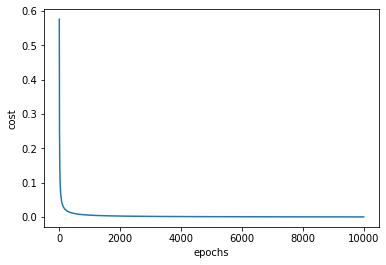

In [15]:
plt.plot(_cost)  #画图
plt.xlabel("epochs")
plt.ylabel("cost")

In [16]:
len(_cost)

10000

In [17]:
dt_x = np.array([1,2,6])  #预测(2，6)这个点的np数组
dt_x

array([1, 2, 6])

In [18]:
prediction = model(dt_x,theta)   #预测

In [19]:
prediction     #prediction >0.5在1类，<0.5在0类

array([0.99999637])

In [20]:
predt = model(data_x,theta)

In [21]:
predt_1 = [i for i in predt if i>0.5]  #＞0.5的在1类
predt_0 = [i for i in predt if i<=0.5] #<0.5的在0类

In [22]:
len(predt_1)   #打印1类的点的个数

10

In [23]:
len(predt_0)   #打印0类的点的个数

10